In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import datetime as dt
import matplotlib.font_manager as fm

In [91]:
plt.rc('font', family='NanumGothic')
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'

## 데이터 전처리 계획

1. 데이터 타입의 수정

- store_id는 정수가 아니고 오히려 식별자로서 string으로 받는 것이 더 적절할 것으로 예상

- date, time -> 통합 및 datetime으로 데이터 전환

## 목표 정리

### 최종 목표: 상점 매출을 가장 정확하게 예측할 수 있는 ML 모델 예측 + 우승자 코드 분석을 통한 실력 상승


### 1차 목표: 우선 내가 어떤 데이터를 보고 있는지 기본적인 특징 정리 -> EDA

(1) 가장 많이 판매하는 Store id 정리 - unique 값 정리 


(2) 가장 판매가 많이 이루어지는 요일 

(3) 가장 판매가 많이 이루어지는 시간대 산출

(4) 요일 & 시간대에 따른 heatmap을 산출해보자 





In [37]:
df = pd.read_csv('train.csv')

In [38]:
df['datetime'] = df['date'] + ' ' + df['time']

In [39]:
df.datetime = pd.to_datetime(df.datetime)

In [141]:
df.date = pd.to_datetime(df.date)

In [40]:
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,datetime
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14 18:05:31
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016-12-14 18:05:54
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12-19 12:42:31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12-19 12:48:08
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12-19 13:31:08


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 9 columns):
store_id        int64
date            object
time            object
card_id         object
amount          int64
installments    float64
days_of_week    int64
holyday         int64
datetime        datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 230.9+ MB


In [122]:
df.store_id.nunique()

1775

In [123]:
df.card_id.nunique()

922522

http://www.hanuribiz.com/news/articleView.html?idxno=6935

In [137]:
df.card_id.nunique() / 1.8

512512.2222222222

In [117]:
df2 = df[['store_id', 'amount','installments']]

In [118]:
grp = pd.DataFrame(df2.groupby('store_id')[['installments', 'amount']].sum()).reset_index()

In [120]:
grp.head()

,store_id,installments,amount
0,0,673.0,5234611
1,1,85.0,147950
2,2,0.0,1615060
3,3,2.0,62781
4,4,0.0,270312


In [66]:
grp = grp.sort_values(by = 'amount', ascending = False).reset_index(drop = True)

In [70]:
grp['store_id'] = [str(grp.store_id[i]) for i in range(grp.shape[0])]

In [82]:
test = grp.iloc[:50]

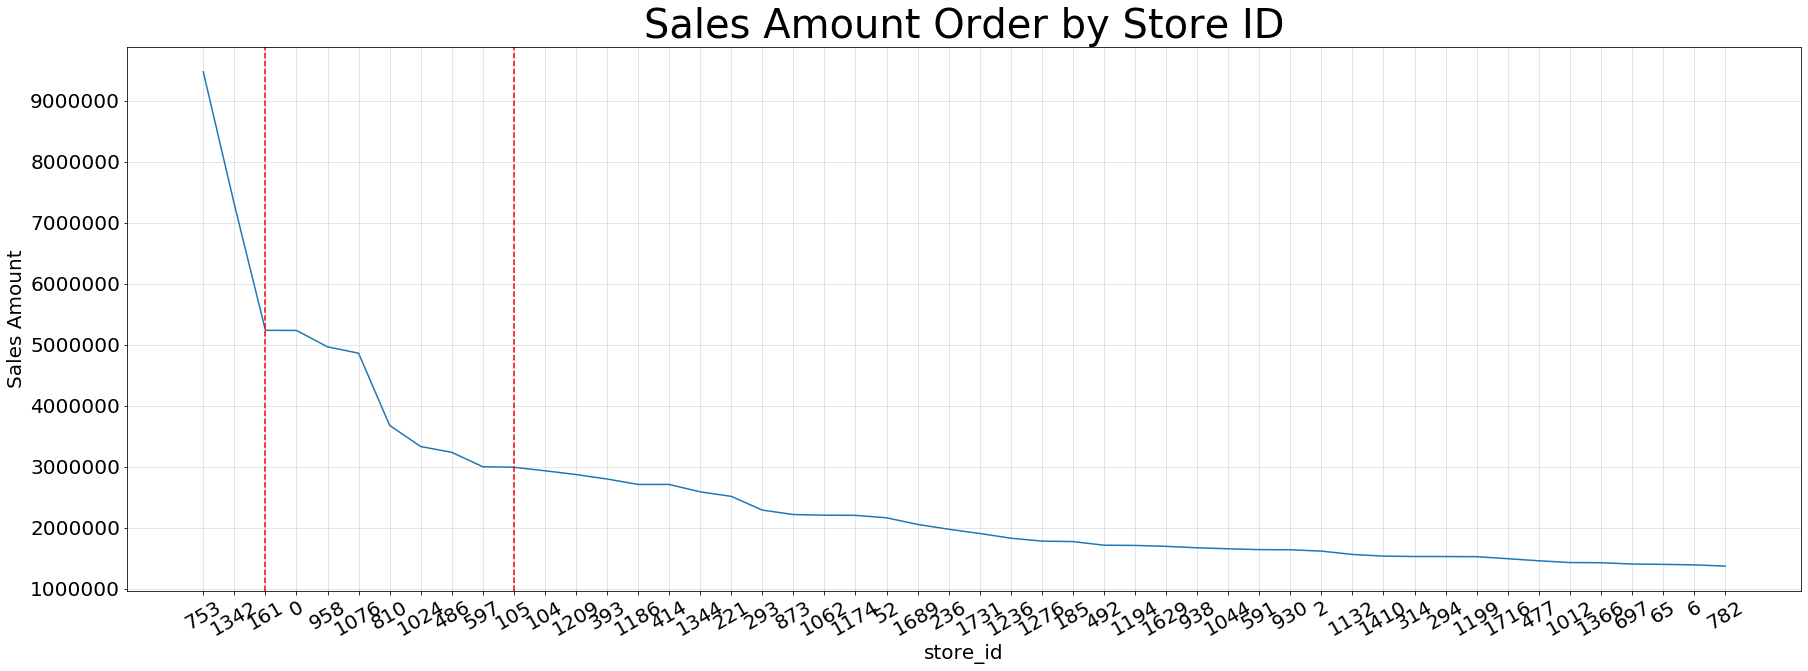

In [132]:
plt.figure(figsize = (30,10))
plt.plot(test.store_id, test.amount)
plt.grid(alpha = 0.4)
plt.title('Sales Amount Order by Store ID', fontsize = 40)
plt.xticks(rotation = 30, fontsize = 20)
plt.xlabel('store_id', fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Sales Amount', fontsize = 20)
plt.axvline(x = 2, color = 'r', linestyle = '--')
plt.axvline(x = 10, color = 'r', linestyle = '--');

In [135]:
grp.describe()

,store_id,installments,amount
count,1775.000000,1775.000000,1.775000e+03
mean,897.965070,32.860282,2.765304e+05
std,519.243611,120.973856,5.318239e+05
min,0.000000,0.000000,0.000000e+00
25%,448.500000,0.000000,3.738550e+04
50%,896.000000,3.000000,1.206910e+05
75%,1346.500000,19.000000,3.074290e+05
max,1799.000000,2516.000000,9.474601e+06


## 가게별 매출 규모 기본 정보 정리

-----------------------------------------------------------------------

## 시계열 데이터로 본 매출 동향 정보

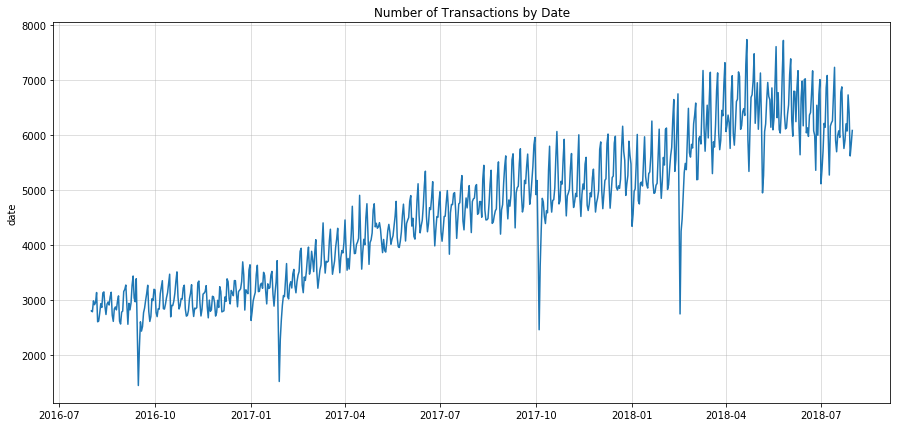

In [173]:
train = pd.read_csv('train.csv')
dates = pd.to_datetime(train.date)
dates = dates.value_counts().sort_index()

plt.figure(figsize=(15,7))
sns.lineplot(x = dates.index, y = dates)
plt.title('Number of Transactions by Date')
plt.grid(alpha = 0.5)
plt.show()

In [140]:
pd.to_datetime(df.time[0])

Timestamp('2020-06-21 18:05:31')

In [156]:
grp2 = pd.DataFrame(df.groupby(df.date)['amount'].sum()).reset_index()

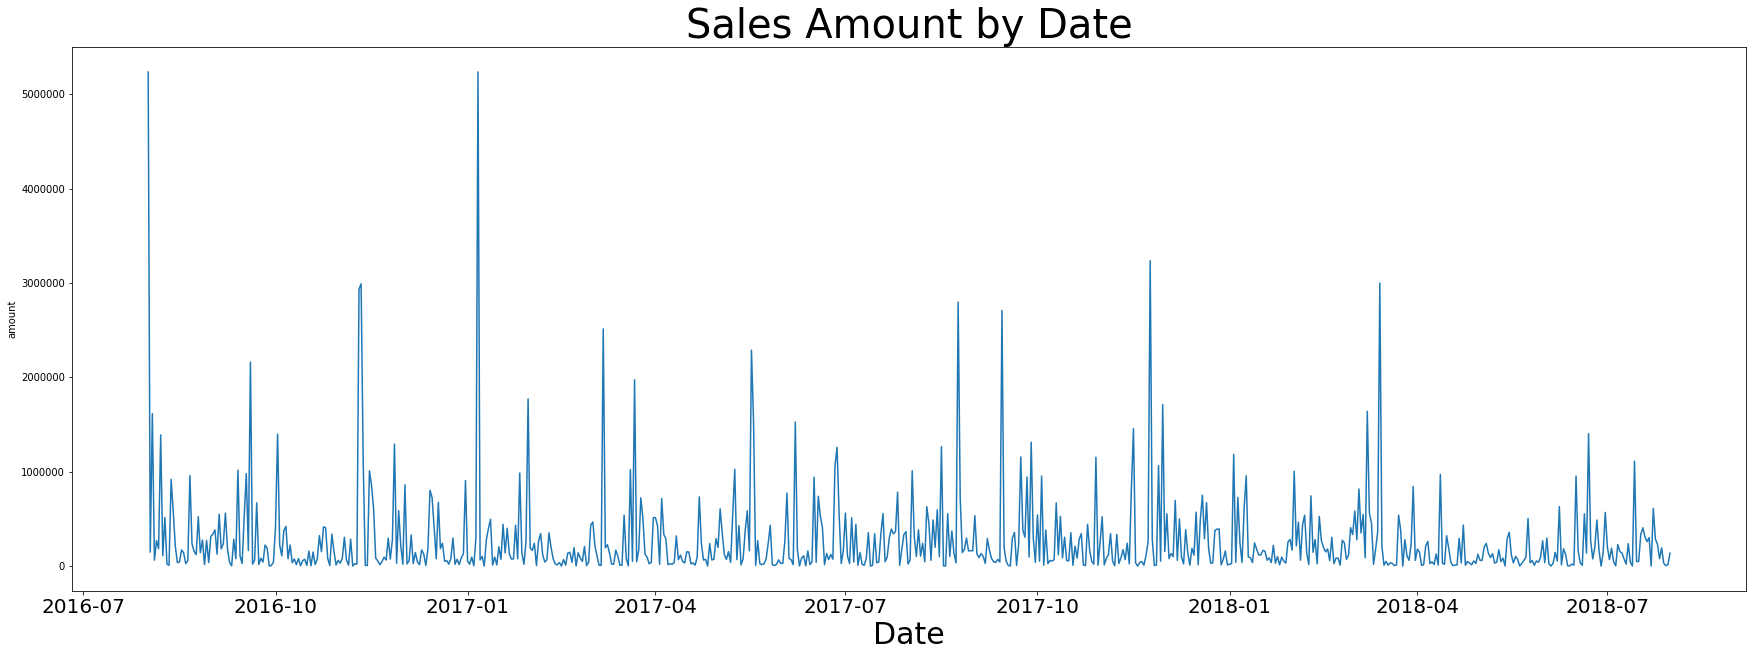

In [172]:
plt.figure(figsize = (30, 10))
sns.lineplot(x = grp2.date, y = grp.amount)
plt.title('Sales Amount by Date', fontsize = 40)
plt.xticks(fontsize = 20)
plt.xlabel('Date', fontsize = 30);

In [202]:
train = pd.read_csv('train.csv')
dates = pd.to_datetime(train.date)

In [220]:
date_df = pd.DataFrame(dates.value_counts()).reset_index()

In [221]:
date_df.columns = ['date', 'counts']
date_df.sort_values(by = 'date', inplace = True)
date_df.reset_index(drop = True, inplace = True)

In [229]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
date      730 non-null datetime64[ns]
counts    730 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [230]:
grp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
date      730 non-null datetime64[ns]
amount    730 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [235]:
sales_date = pd.merge(grp2, date_df)

In [237]:
sales_date['unit_sales'] = sales_date['amount'] / sales_date['counts']

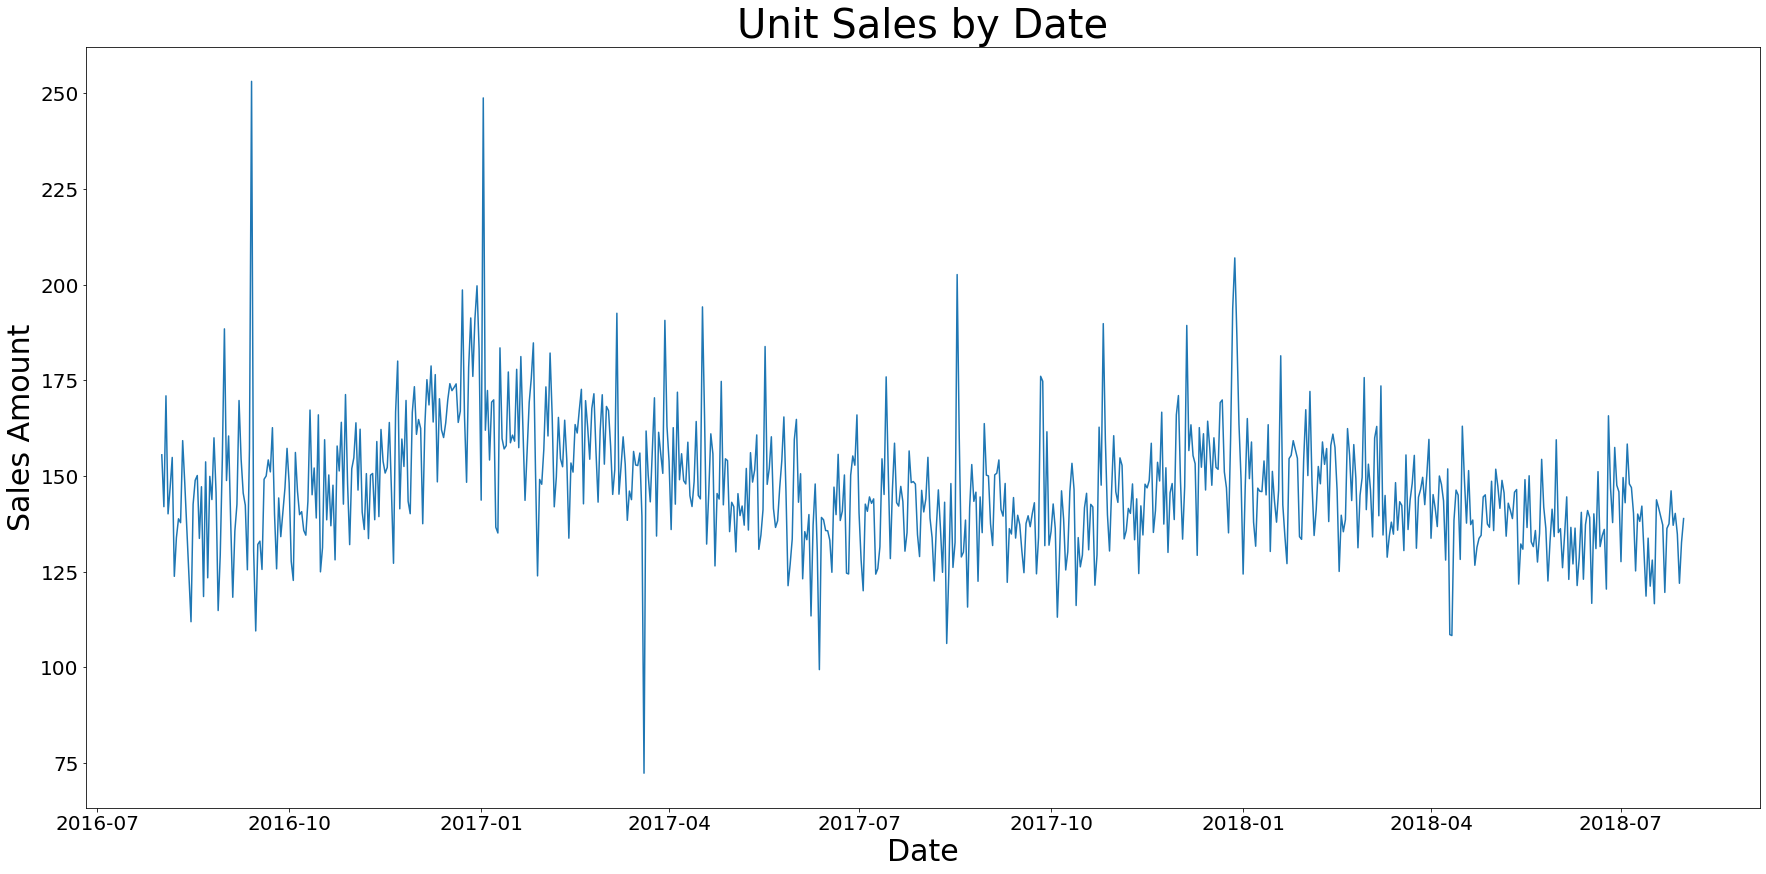

In [246]:
plt.figure(figsize = (30, 14))
sns.lineplot(sales_date.date, sales_date.unit_sales)
plt.title('Unit Sales by Date', fontsize = 40)
plt.xticks(fontsize = 20)
plt.xlabel('Date', fontsize = 30)
plt.yticks(fontsize = 20)
plt.ylabel('Sales Amount', fontsize = 30);

In [166]:
df.iloc[:10].groupby('store_id')['amount'].sum()

store_id
0    787
Name: amount, dtype: int64

In [165]:
df.iloc[:10].amount.sum()

787